In [1]:
import gym
import matplotlib.pyplot as plt
import torch
import numpy as np
import timebudget
timebudget.set_quiet()

In [2]:
import rltrain
from importlib import reload
reload(rltrain)

<module 'rltrain' from '/Users/leodirac/dev/ddpg/rltrain.py'>

In [3]:
env = gym.make('CartPole-v0')
learner = rltrain.DQN(env)

Creating FCNet with 4->2 dims for 4 observations and 2 actions


In [4]:
def dist_rollouts(eps:float, n:int=100) -> [list, list]:
    learner.eps = eps
    frames = []
    rewards = []
    for i in range(100):
        f, r = learner.rollout(render=False)
        frames.append(f)
        rewards.append(r)
    plt.hist(rewards, bins=20)
    plt.show()
    print(f"Reward mean,std = {np.mean(rewards):.3f} +/- {np.std(rewards):.3f}")
    return rewards, frames



Eps = 1.00
Loss = 1.56411
Loss = 0.03308
Loss = 0.03293
Loss = 0.02406
Loss = 0.03593
Loss = 0.89682
Loss = 0.08356
Loss = 0.00077
Loss = 0.02909
Loss = 0.05489
Loss = 0.96637


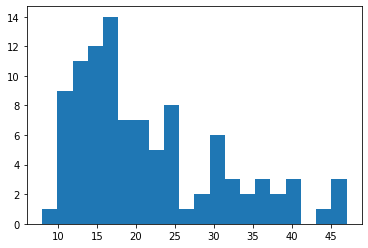

Reward mean,std = 21.500 +/- 9.707


Eps = 0.91
Loss = 0.39834
Loss = 0.29821
Loss = 0.29712
Loss = 0.29852
Loss = 1.15279
Loss = 0.22838
Loss = 0.22604
Loss = 0.43843
Loss = 0.65491
Loss = 1.48463


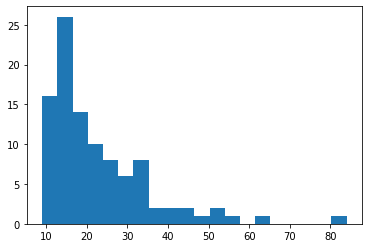

Reward mean,std = 22.640 +/- 12.885


Eps = 0.83
Loss = 0.00298
Loss = 0.38893
Loss = 1.11473
Loss = 0.76600
Loss = 1.26355
Loss = 0.58902
Loss = 1.11258
Loss = 0.57701
Loss = 1.11197
Loss = 1.89894
Loss = 1.47971
Loss = 2.18864


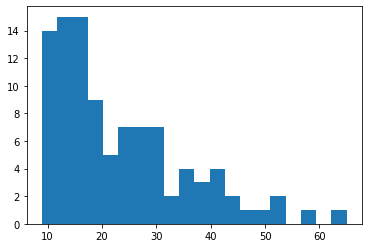

Reward mean,std = 23.290 +/- 12.190


Eps = 0.74
Loss = 0.76393
Loss = 0.03406
Loss = 0.92441
Loss = 4.60881
Loss = 0.11185
Loss = 0.00601
Loss = 1.87476
Loss = 2.71555


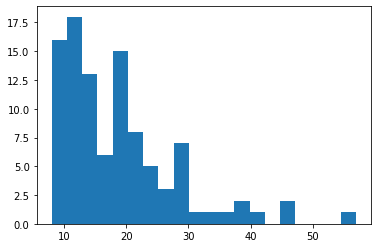

Reward mean,std = 18.660 +/- 9.193


Eps = 0.65
Loss = 2.43639
Loss = 0.11691
Loss = 1.27895
Loss = 2.42538
Loss = 3.17488
Loss = 1.52200
Loss = 0.21999
Loss = 1.51840
Loss = 4.34739
Loss = 0.86705


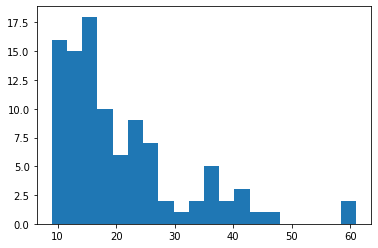

Reward mean,std = 20.890 +/- 10.716


Eps = 0.57
Loss = 1.81003
Loss = 3.46093
Loss = 3.50807
Loss = 8.58024
Loss = 0.85939
Loss = 4.02649
Loss = 2.13948
Loss = 0.24528
Loss = 4.06637


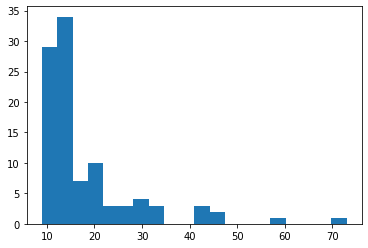

Reward mean,std = 18.260 +/- 10.782


Eps = 0.48
Loss = 2.79417
Loss = 2.46656
Loss = 2.37610
Loss = 4.60453
Loss = 6.76849
Loss = 5.19735
Loss = 0.27940
Loss = 2.71179


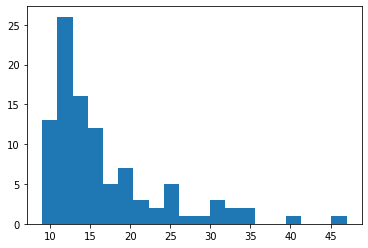

Reward mean,std = 16.500 +/- 7.492


Eps = 0.39
Loss = 2.91759
Loss = 2.69428
Loss = 3.32269
Loss = 5.76410
Loss = 8.59097
Loss = 5.75397
Loss = 5.74441


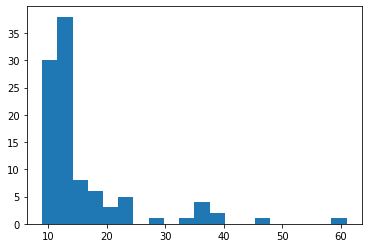

Reward mean,std = 15.960 +/- 8.741


Eps = 0.30
Loss = 8.88995
Loss = 3.24461
Loss = 3.21089
Loss = 3.22871
Loss = 6.14962
Loss = 3.76172
Loss = 9.90214


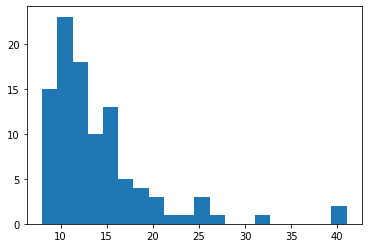

Reward mean,std = 14.050 +/- 5.932


Eps = 0.22
Loss = 6.67694
Loss = 6.65903
Loss = 3.60392
Loss = 7.12780
Loss = 7.08523
Loss = 3.73194
Loss = 3.76869


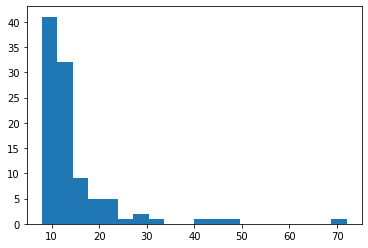

Reward mean,std = 14.630 +/- 9.000


In [5]:
N = 10
for d in range(N):
    eps = 1.0 - d/(N+1.5)
    print(f"\n\nEps = {eps:.2f}")
    _ = dist_rollouts(eps)

In [6]:
timebudget.report('rollout')

timebudget report per rollout cycle...
                  rollout: 100.0%    16.00ms/cyc @     1.0 calls/cyc
              do_learning:  91.6%    14.65ms/cyc @    17.6 calls/cyc
                optimizer:  50.4%     8.06ms/cyc @    17.6 calls/cyc
                   sample:  14.4%     2.30ms/cyc @    17.6 calls/cyc
                 q_target:  12.2%     1.95ms/cyc @    17.6 calls/cyc


5.140618801116943 +/- 2.0280776023864746


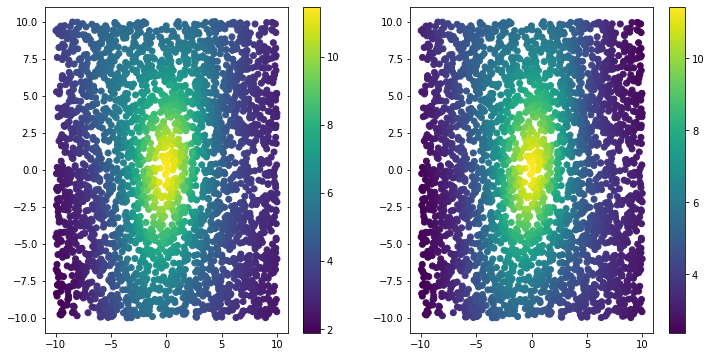

In [8]:
N = 3000
ob = (torch.rand(N,4) - 0.5) * 20
ob[:,0:2] *= 0
qb = learner.qnet.calc_qval_batch(ob)
print(f"{torch.mean(qb)} +/- {torch.std(qb)}")
#_ = plt.hist(qb.cpu().detach().numpy(), bins=50)
fix = lambda t: t.cpu().detach().numpy()
ob = fix(ob)
qb = fix(qb)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(x=ob[:,2],y=ob[:,3], c=qb[:,0])
plt.colorbar()
plt.subplot(1,2,2)
plt.scatter(x=ob[:,2],y=ob[:,3], c=qb[:,1])
plt.colorbar()

Loss = 7.09359
Loss = 0.79571
Loss = 4.02146
Loss = 0.62369
Loss = 0.42932


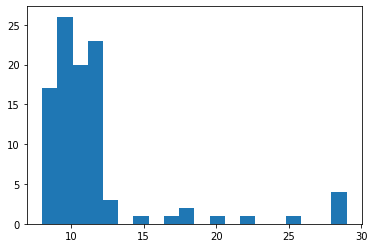

Reward mean,std = 11.940 +/- 4.324


In [9]:
# check greedy
_ = dist_rollouts(0)

Loss = 7.70769
Loss = 0.77211
Loss = 0.50386
Loss = 0.42495
Loss = 11.61828
Loss = 0.55795
Loss = 0.76183
Loss = 4.39640
Loss = 4.40265
Loss = 12.07702
Loss = 12.02105


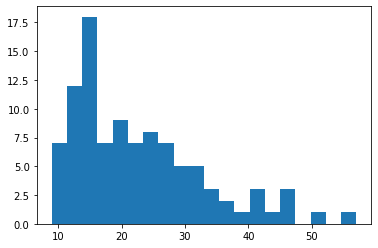

Reward mean,std = 22.570 +/- 10.328


In [10]:
# check random
_ = dist_rollouts(1)